## Distributions with Two Random Variables

Plotting the empirical PDF of $ \mathbf{z} $ (where $ \mathbf{z} = \mathbf{x} + \mathbf{y} $) and compare it with the theoretical PDF derived from the convolution of the PDFs of $ \mathbf{x} $ and $ \mathbf{y} $. 

### Generate the Random Variables
We'll start by generating two independent random variables $ \mathbf{x} $ and $ \mathbf{y} $, each following a Gaussian distribution with zero mean and unit variance. Then we'll compute $ \mathbf{z} = \mathbf{x} + \mathbf{y} $.

### Plot the Empirical PDF of $ \mathbf{z} $
We'll create a histogram of the data for $ \mathbf{z} $ and normalize it to represent the empirical PDF.

### Calculate the Theoretical PDF of $ \mathbf{z} $
Since $ \mathbf{z} $ is the sum of two independent Gaussian random variables, its PDF can be calculated as the convolution of the individual PDFs of $ \mathbf{x} $ and $ \mathbf{y} $. Given that both $ \mathbf{x} $ and $ \mathbf{y} $ are Gaussian, the theoretical PDF of $ \mathbf{z} $ will also be Gaussian with mean $ 0 $ and variance $ 2 $ (since the variance of the sum is the sum of the variances).


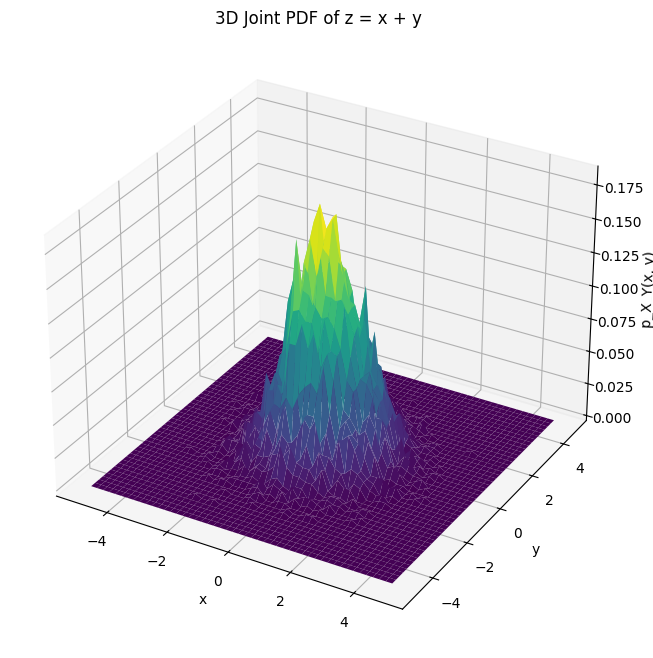

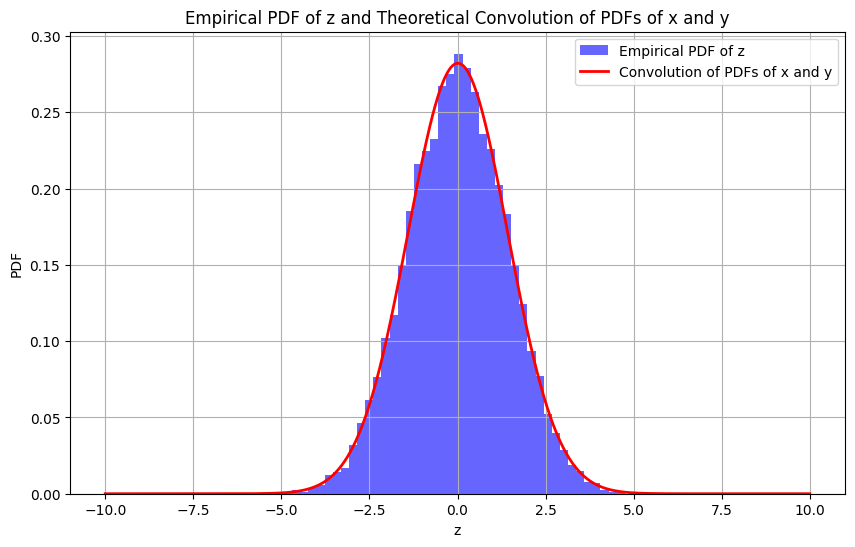

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.signal import convolve

def generate_joint_gaussian_pdf(num_samples):
    # Generate independent Gaussian random variables
    x = np.random.normal(0, 1, num_samples)
    y = np.random.normal(0, 1, num_samples)
    z = x + y

    # Define the grid for the histogram
    x_bins = np.linspace(-5, 5, 50)
    y_bins = np.linspace(-5, 5, 50)
    X, Y = np.meshgrid(x_bins, y_bins)

    # Compute the 2D histogram for the joint PDF
    hist, x_edges, y_edges = np.histogram2d(x, y, bins=(x_bins, y_bins), density=True)

    # Meshgrid for the bins
    X, Y = np.meshgrid(x_edges[:-1], y_edges[:-1])

    # Plot the 3D surface of the joint PDF
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, hist, cmap='viridis')

    # Label the axes
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('p_X_Y(x, y)')
    ax.set_title('3D Joint PDF of z = x + y')
    plt.show()

    # Step 2: Plot the empirical PDF of z
    plt.figure(figsize=(10, 6))
    plt.hist(z, bins=50, density=True, alpha=0.6, color='blue', label='Empirical PDF of z')

    # Step 3: Compute and plot the convolution of PDFs of x and y
    z_range = np.linspace(-10, 10, 1000)
    pdf_x = norm.pdf(z_range, loc=0, scale=1)
    pdf_y = norm.pdf(z_range, loc=0, scale=1)
    
    # Convolution of pdf_x and pdf_y
    pdf_z_convolution = convolve(pdf_x, pdf_y, mode='same') * (z_range[1] - z_range[0])

    plt.plot(z_range, pdf_z_convolution, 'r-', linewidth=2, label=r'Convolution of PDFs of x and y')
    
    # Add labels and legend
    plt.xlabel('z')
    plt.ylabel('PDF')
    plt.title('Empirical PDF of z and Theoretical Convolution of PDFs of x and y')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
generate_joint_gaussian_pdf(10000)


## Schonhoff's Method

- This code generates a 2-dimensional (2D) joint Gaussian random variable (RV) and then computes and displays its empirical joint probability density function (PDF). 

- The random variables (RVs) generated are statistically independent, have zero mean, and unit variance. 

- The empirical PDF is obtained using a histogram-based method.



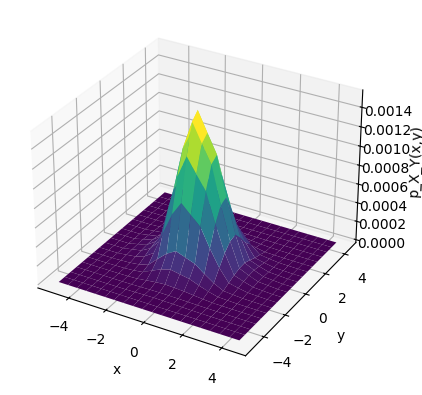

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def generate_joint_gaussian_pdf(num):
    """
    Generate the empirical joint Gaussian PDF.

    Parameters:
    num (int): Number of random variables (RVs) to generate.

    Returns:
    numpy.ndarray: The empirical joint Gaussian PDF.
    """
    # Initialize arrays for storing the generated random variables
    x = np.zeros(num)
    y = np.zeros(num)

    # Generate the random variables using the Box-Muller transform
    for i in range(num):
        ui = np.random.rand()
        uq = np.random.rand()
        x[i] = np.sqrt(-2 * np.log(ui)) * np.cos(2 * np.pi * uq)
        y[i] = np.sqrt(-2 * np.log(ui)) * np.sin(2 * np.pi * uq)

    # Define the bins for the histogram
    x_bins = np.arange(-5, 5.5, 0.5)
    y_bins = np.arange(-5, 5.5, 0.5)

    # Compute the histograms
    nx, _ = np.histogram(x, bins=x_bins)
    ny, _ = np.histogram(y, bins=y_bins)

    # Compute the joint histogram (empirical joint PDF)
    joint_pdf = np.outer(nx, ny)

    # Normalize the joint histogram to approximate the joint PDF
    joint_pdf = joint_pdf * 4 / 1e8

    # Plotting the joint PDF
    X, Y = np.meshgrid(x_bins[:-1], y_bins[:-1])
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, joint_pdf, cmap='viridis')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('p_X_Y(x,y)')
    plt.show()

    return joint_pdf  # Ensure that the output is not printed automatically by assigning to a variable

# Example usage
# Call the function but do not display the result
_ = generate_joint_gaussian_pdf(1000)
